# **<span style='color:black'>ANALYSE DES VENTES DE LA LIBRAIRIE LAPAGE</span>**

In [1]:
# Import des librairies Python
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import scipy as sc
import seaborn as sns
from datetime import datetime, date
import plotly.express as px

In [2]:
# Import des fichiers
customers=pd.read_csv('customers.csv')
products=pd.read_csv('products.csv')
transactions=pd.read_csv('transactions.csv')

# **<span style='color:red'>I. NETTOYAGE DES FICHIERS</span>**

# **<span style='color:black'>Fichier customers</span>**

In [3]:
customers.head(), customers.shape

(  client_id sex  birth
 0    c_4410   f   1967
 1    c_7839   f   1975
 2    c_1699   f   1984
 3    c_5961   f   1962
 4    c_5320   m   1943,
 (8623, 3))

In [4]:
customers.describe(include='all')

,client_id,sex,birth
count,8623,8623,8623.000000
unique,8623,2,NaN
top,c_1046,f,NaN
freq,1,4491,NaN
mean,NaN,NaN,1978.280877
std,NaN,NaN,16.919535
min,NaN,NaN,1929.000000
25%,NaN,NaN,1966.000000
50%,NaN,NaN,1979.000000
75%,NaN,NaN,1992.000000


In [5]:
customers.info

<bound method DataFrame.info of      client_id sex  birth
0       c_4410   f   1967
1       c_7839   f   1975
2       c_1699   f   1984
3       c_5961   f   1962
4       c_5320   m   1943
...        ...  ..    ...
8618    c_7920   m   1956
8619    c_7403   f   1970
8620    c_5119   m   1974
8621    c_5643   f   1968
8622      c_84   f   1982

[8623 rows x 3 columns]>

In [6]:
customers.isnull().sum()

client_id    0
sex          0
birth        0
dtype: int64

# **<span style='color:black'>Fichier products</span>**

In [7]:
products.head(), products.shape

(  id_prod  price  categ
 0  0_1421  19.99      0
 1  0_1368   5.13      0
 2   0_731  17.99      0
 3   1_587   4.99      1
 4  0_1507   3.99      0,
 (3287, 3))

In [8]:
products.describe(include='all')

,id_prod,price,categ
count,3287,3287.000000,3287.000000
unique,3287,NaN,NaN
top,0_219,NaN,NaN
freq,1,NaN,NaN
mean,NaN,21.856641,0.370246
std,NaN,29.847908,0.615387
min,NaN,-1.000000,0.000000
25%,NaN,6.990000,0.000000
50%,NaN,13.060000,0.000000
75%,NaN,22.990000,1.000000


In [9]:
#comment = clef primaire et conditions

In [10]:
#comment = clef primaire et conditions

In [11]:
#faire boxplot et quartiles  pour valeurs abérrantes => on se rend compte qu'il y a un produit négatif, on regardera de plus près

<AxesSubplot:xlabel='price'>

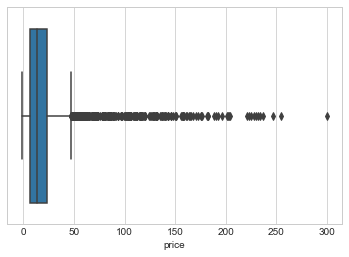

In [12]:
sns.boxplot(x=products['price'])

In [13]:
products[products['price']<0]

,id_prod,price,categ
731,T_0,-1.0,0


In [14]:
#J'ai découvert qu'il y avait un produit dont le prix était iférieur à zéro
#Après vérification, je soupçonne qu'il s'agit d'un produit test utilisé par les informaticiens du site
# Je décide de ne pas considérer cette ligne 
products= products[products['price']>0]
products.describe(include='all')

,id_prod,price,categ
count,3286,3286.000000,3286.000000
unique,3286,NaN,NaN
top,0_219,NaN,NaN
freq,1,NaN,NaN
mean,NaN,21.863597,0.370359
std,NaN,29.849786,0.615446
min,NaN,0.620000,0.000000
25%,NaN,6.990000,0.000000
50%,NaN,13.075000,0.000000
75%,NaN,22.990000,1.000000


In [15]:
products.info

<bound method DataFrame.info of      id_prod   price  categ
0     0_1421   19.99      0
1     0_1368    5.13      0
2      0_731   17.99      0
3      1_587    4.99      1
4     0_1507    3.99      0
...      ...     ...    ...
3282    2_23  115.99      2
3283   0_146   17.14      0
3284   0_802   11.22      0
3285   1_140   38.56      1
3286  0_1920   25.16      0

[3286 rows x 3 columns]>

In [16]:
products.isnull().sum()

id_prod    0
price      0
categ      0
dtype: int64

# **<span style='color:black'>Fichier transactions</span>**

In [17]:
transactions.head(), transactions.shape

(  id_prod                        date session_id client_id
 0  0_1518  2022-05-20 13:21:29.043970   s_211425     c_103
 1   1_251  2022-02-02 07:55:19.149409   s_158752    c_8534
 2  0_1277  2022-06-18 15:44:33.155329   s_225667    c_6714
 3   2_209  2021-06-24 04:19:29.835891    s_52962    c_6941
 4  0_1509  2023-01-11 08:22:08.194479   s_325227    c_4232,
 (679532, 4))

In [18]:
transactions.describe()

,id_prod,date,session_id,client_id
count,679532,679532,679532,679532
unique,3267,679371,342316,8602
top,1_369,test_2021-03-01 02:30:02.237413,s_0,c_1609
freq,2252,13,200,25488


In [19]:
#Le nombre unique d'id_prod  dans le fichier transaction est inférieur au nombre id_prod dans le fichier products,
#On peut donc conclure qu'il y a des produits qui n'ont pas fait l'objet de transactions.

#Le nombre de client_id  dans le fichier transaction est également inférieur au nombre de client_id dans le fichier customers
#Je vais creuser pour comprendre le delta entre les deux

#Je vois qu'il y a un format de date avec le préfix 'test', probablement des test de l'équipe technique, je vais creuser pour moeiux comprendre

In [20]:
transactions.info

<bound method DataFrame.info of        id_prod                        date session_id client_id
0       0_1518  2022-05-20 13:21:29.043970   s_211425     c_103
1        1_251  2022-02-02 07:55:19.149409   s_158752    c_8534
2       0_1277  2022-06-18 15:44:33.155329   s_225667    c_6714
3        2_209  2021-06-24 04:19:29.835891    s_52962    c_6941
4       0_1509  2023-01-11 08:22:08.194479   s_325227    c_4232
...        ...                         ...        ...       ...
679527  0_1551  2022-01-15 13:05:06.246925   s_150195    c_8489
679528   1_639  2022-03-19 16:03:23.429229   s_181434    c_4370
679529  0_1425  2022-12-20 04:33:37.584749   s_314704     c_304
679530  0_1994  2021-07-16 20:36:35.350579    s_63204    c_2227
679531   1_523  2022-09-28 01:12:01.973763   s_274568    c_3873

[679532 rows x 4 columns]>

In [21]:
transactions.isnull().sum()

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

In [22]:
transactions_test=transactions[transactions['date'].str.contains('test')]
print(transactions_test)

       id_prod                             date session_id client_id
3019       T_0  test_2021-03-01 02:30:02.237419        s_0      ct_0
5138       T_0  test_2021-03-01 02:30:02.237425        s_0      ct_0
9668       T_0  test_2021-03-01 02:30:02.237437        s_0      ct_1
10728      T_0  test_2021-03-01 02:30:02.237436        s_0      ct_0
15292      T_0  test_2021-03-01 02:30:02.237430        s_0      ct_0
...        ...                              ...        ...       ...
657830     T_0  test_2021-03-01 02:30:02.237417        s_0      ct_0
662081     T_0  test_2021-03-01 02:30:02.237427        s_0      ct_1
670680     T_0  test_2021-03-01 02:30:02.237449        s_0      ct_1
671647     T_0  test_2021-03-01 02:30:02.237424        s_0      ct_1
679180     T_0  test_2021-03-01 02:30:02.237425        s_0      ct_1

[200 rows x 4 columns]


In [23]:
transactions_test.describe()

,id_prod,date,session_id,client_id
count,200,200,200,200
unique,1,39,1,2
top,T_0,test_2021-03-01 02:30:02.237413,s_0,ct_0
freq,200,13,200,106


Ici on peut voir que 200 lignes correspondent aux tests effectués par les informaticiens 
Les produits sont liés aux mêmes id_client et id_prod, les 200 lignes concernent le même produits T_0, la même session s_0, et le même id client ct_0 et ct_1.

In [24]:
#Supression 
transactions= transactions[transactions['id_prod']!='T_0']
transactions[transactions['id_prod']=='T_0']

,id_prod,date,session_id,client_id


In [25]:
customers= customers[(customers['client_id']!='ct_0')&(customers['client_id']!='ct_1')]
customers[customers['client_id']=='ct_0']

,client_id,sex,birth


# **<span style='color:red'>II. ANALYSE DES DIFFERENTS INDICATEURS DE VENTE</span>**

# **<span style='color:black'>Elaboration de la table </span>**

Client_id est une bonne clé pour le fichier customers puisqu'il y a 8621 valeurs uniques sur 8621 valeurs au total (cf .describe() plus haut)
id_prod est une bonne clé pour le fichier products puisqu'il y a 3286 valeurs uniques sur 3286 valeurs au total (cf .describe() plus haut)
La création d'un dataframe duplicate, afin de vérifier l'unicité des transacations, montre que les 679332 transactions répertoriées sont uniques
Ces vérifications faites on peut faire les jointures, on souhaite conserver toutes les informations présentes dans tab et les lier à celles présentes dans les deux autres dataframes. id_prod et client_id pourront être répétés plusieurs fois dans Transactions_df mais certains produits peuvent ne jamais avoir été vendus où certains clients peuvent ne jamais avoir effectué d'achats on souhaite pourtant conserver leurs informations. On fera une jointure 'merge'. On s'attend donc à avoir in fine un dataframe avec 679332 lignes minimum (+ produits jamais vendus et clients non acheteurs). Il peut s'agir de clients n'achetant pas sur plusieurs sessions.

In [26]:
tran_cust= pd.merge(transactions, customers, on='client_id', how='left', indicator=True)
tran_cust

,id_prod,date,session_id,client_id,sex,birth,_merge
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986,both
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,m,1988,both
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,f,1968,both
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,m,2000,both
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,m,1980,both
...,...,...,...,...,...,...,...
679327,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,f,1951,both
679328,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,f,1977,both
679329,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,f,1988,both
679330,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,m,1986,both


In [27]:
tran_cust['_merge'].unique()

['both']
Categories (1, object): ['both']

Je constate que la jointure à bien fonctionnée. Chaque éléments du fichier customers a trouvé son élément dans le fichier transaction. 

In [28]:
#Vérification des valeurs nulles
tran_cust.isnull().sum(), tran_cust.shape

(id_prod       0
 date          0
 session_id    0
 client_id     0
 sex           0
 birth         0
 _merge        0
 dtype: int64,
 (679332, 7))

In [29]:
tran_cust.drop(columns=['_merge'], inplace=True)
tran_cust.head()

,id_prod,date,session_id,client_id,sex,birth
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,m,1988
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,f,1968
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,m,2000
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,m,1980


In [30]:
tran_cust_prod=pd.merge(tran_cust, products, on='id_prod', how='left', indicator=True)
tran_cust_prod

,id_prod,date,session_id,client_id,sex,birth,price,categ,_merge
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986,4.18,0.0,both
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,m,1988,15.99,1.0,both
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,f,1968,7.99,0.0,both
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,m,2000,69.99,2.0,both
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,m,1980,4.99,0.0,both
...,...,...,...,...,...,...,...,...,...
679327,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,f,1951,12.99,0.0,both
679328,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,f,1977,10.99,1.0,both
679329,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,f,1988,12.99,0.0,both
679330,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,m,1986,4.98,0.0,both


In [31]:
tran_cust_prod['_merge'].unique()

['both', 'left_only']
Categories (2, object): ['both', 'left_only']

In [32]:
tran_cust_prod.isnull().sum(), tran_cust.shape

(id_prod         0
 date            0
 session_id      0
 client_id       0
 sex             0
 birth           0
 price         221
 categ         221
 _merge          0
 dtype: int64,
 (679332, 6))

In [33]:
voir_equipe = tran_cust_prod.loc[tran_cust_prod['_merge']=='left_only']
voir_equipe

,id_prod,date,session_id,client_id,sex,birth,price,categ,_merge
2633,0_2245,2022-09-23 07:22:38.636773,s_272266,c_4746,m,1940,NaN,NaN,left_only
10103,0_2245,2022-07-23 09:24:14.133889,s_242482,c_6713,f,1963,NaN,NaN,left_only
11723,0_2245,2022-12-03 03:26:35.696673,s_306338,c_5108,m,1978,NaN,NaN,left_only
15670,0_2245,2021-08-16 11:33:25.481411,s_76493,c_1391,m,1991,NaN,NaN,left_only
16372,0_2245,2022-07-16 05:53:01.627491,s_239078,c_7954,m,1973,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...
669533,0_2245,2021-08-25 09:06:03.504061,s_80395,c_131,m,1981,NaN,NaN,left_only
670484,0_2245,2022-03-06 19:59:19.462288,s_175311,c_4167,f,1979,NaN,NaN,left_only
671088,0_2245,2022-05-16 11:35:20.319501,s_209381,c_4453,m,1981,NaN,NaN,left_only
675480,0_2245,2022-02-11 09:05:43.952857,s_163405,c_1098,m,1986,NaN,NaN,left_only


In [34]:
voir_equipe.describe(include='all')

,id_prod,date,session_id,client_id,sex,birth,price,categ,_merge
count,221,221,221,221,221,221.000000,0.0,0.0,221
unique,1,221,221,100,2,NaN,NaN,NaN,1
top,0_2245,2021-09-10 08:04:02.763762,s_107564,c_1551,f,NaN,NaN,NaN,left_only
freq,221,1,1,6,117,NaN,NaN,NaN,221
mean,NaN,NaN,NaN,NaN,NaN,1977.782805,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,10.837556,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,1933.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,1973.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,1979.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,1984.000000,NaN,NaN,NaN


221 transactions, dans lesquelles la jointure n'a pas fonctionnée, 


In [35]:
products[products['id_prod']=='0_2245']

,id_prod,price,categ


In [36]:
transactions[transactions['id_prod']=='0_2245']

,id_prod,date,session_id,client_id
2633,0_2245,2022-09-23 07:22:38.636773,s_272266,c_4746
10106,0_2245,2022-07-23 09:24:14.133889,s_242482,c_6713
11727,0_2245,2022-12-03 03:26:35.696673,s_306338,c_5108
15675,0_2245,2021-08-16 11:33:25.481411,s_76493,c_1391
16377,0_2245,2022-07-16 05:53:01.627491,s_239078,c_7954
...,...,...,...,...
669730,0_2245,2021-08-25 09:06:03.504061,s_80395,c_131
670682,0_2245,2022-03-06 19:59:19.462288,s_175311,c_4167
671286,0_2245,2022-05-16 11:35:20.319501,s_209381,c_4453
675679,0_2245,2022-02-11 09:05:43.952857,s_163405,c_1098


In [37]:
#On remarque que les 221 transactions n'existent pas dans le fichier products, on va donc les rajouter
products=transactions[transactions['id_prod']=='0_2245'].append(products,ignore_index=True)
products[products['id_prod']=='0_2245']

,id_prod,date,session_id,client_id,price,categ
0,0_2245,2022-09-23 07:22:38.636773,s_272266,c_4746,NaN,NaN
1,0_2245,2022-07-23 09:24:14.133889,s_242482,c_6713,NaN,NaN
2,0_2245,2022-12-03 03:26:35.696673,s_306338,c_5108,NaN,NaN
3,0_2245,2021-08-16 11:33:25.481411,s_76493,c_1391,NaN,NaN
4,0_2245,2022-07-16 05:53:01.627491,s_239078,c_7954,NaN,NaN
...,...,...,...,...,...,...
216,0_2245,2021-08-25 09:06:03.504061,s_80395,c_131,NaN,NaN
217,0_2245,2022-03-06 19:59:19.462288,s_175311,c_4167,NaN,NaN
218,0_2245,2022-05-16 11:35:20.319501,s_209381,c_4453,NaN,NaN
219,0_2245,2022-02-11 09:05:43.952857,s_163405,c_1098,NaN,NaN


In [38]:
#Vérification de l'ajout
products

,id_prod,date,session_id,client_id,price,categ
0,0_2245,2022-09-23 07:22:38.636773,s_272266,c_4746,NaN,NaN
1,0_2245,2022-07-23 09:24:14.133889,s_242482,c_6713,NaN,NaN
2,0_2245,2022-12-03 03:26:35.696673,s_306338,c_5108,NaN,NaN
3,0_2245,2021-08-16 11:33:25.481411,s_76493,c_1391,NaN,NaN
4,0_2245,2022-07-16 05:53:01.627491,s_239078,c_7954,NaN,NaN
...,...,...,...,...,...,...
3502,2_23,NaN,NaN,NaN,115.99,2.0
3503,0_146,NaN,NaN,NaN,17.14,0.0
3504,0_802,NaN,NaN,NaN,11.22,0.0
3505,1_140,NaN,NaN,NaN,38.56,1.0


In [39]:
tab=pd.merge(tran_cust, products, on='id_prod', how='left', indicator=True)
tab

,id_prod,date_x,session_id_x,client_id_x,sex,birth,date_y,session_id_y,client_id_y,price,categ,_merge
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986,NaN,NaN,NaN,4.18,0.0,both
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,m,1988,NaN,NaN,NaN,15.99,1.0,both
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,f,1968,NaN,NaN,NaN,7.99,0.0,both
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,m,2000,NaN,NaN,NaN,69.99,2.0,both
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,m,1980,NaN,NaN,NaN,4.99,0.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...
727947,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,f,1951,NaN,NaN,NaN,12.99,0.0,both
727948,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,f,1977,NaN,NaN,NaN,10.99,1.0,both
727949,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,f,1988,NaN,NaN,NaN,12.99,0.0,both
727950,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,m,1986,NaN,NaN,NaN,4.98,0.0,both


In [40]:
tab['_merge'].unique()

['both']
Categories (1, object): ['both']

In [41]:
tab = tab.loc[tab['_merge']=='both']
tab

,id_prod,date_x,session_id_x,client_id_x,sex,birth,date_y,session_id_y,client_id_y,price,categ,_merge
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986,NaN,NaN,NaN,4.18,0.0,both
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,m,1988,NaN,NaN,NaN,15.99,1.0,both
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,f,1968,NaN,NaN,NaN,7.99,0.0,both
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,m,2000,NaN,NaN,NaN,69.99,2.0,both
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,m,1980,NaN,NaN,NaN,4.99,0.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...
727947,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,f,1951,NaN,NaN,NaN,12.99,0.0,both
727948,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,f,1977,NaN,NaN,NaN,10.99,1.0,both
727949,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,f,1988,NaN,NaN,NaN,12.99,0.0,both
727950,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,m,1986,NaN,NaN,NaN,4.98,0.0,both


In [42]:
tab = tab.copy()
tab.drop(columns=['_merge', 'date_y', 'session_id_y', 'client_id_y'], inplace=True)
tab

,id_prod,date_x,session_id_x,client_id_x,sex,birth,price,categ
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986,4.18,0.0
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,m,1988,15.99,1.0
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,f,1968,7.99,0.0
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,m,2000,69.99,2.0
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,m,1980,4.99,0.0
...,...,...,...,...,...,...,...,...
727947,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,f,1951,12.99,0.0
727948,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,f,1977,10.99,1.0
727949,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,f,1988,12.99,0.0
727950,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,m,1986,4.98,0.0


In [ ]:
tab['date_2'] = pd.to_datetime(tab['date_x']).dt.date
tab['time'] = pd.to_datetime(tab['date_x']).dt.time
tab['years'] = pd.to_datetime(tab['date_x']).dt.year
tab['month'] = pd.to_datetime(tab['date_x']).dt.month
tab['month_year']=pd.to_datetime(tab['date_x']).dt.strftime("%m-%Y")
tab['age']= 2022-(tab['birth'])
tab

# **<span style='color:black'>Calculs des moyennes et CA </span>**

In [ ]:
#calcul des  moyennes de prix par  categorie 
tab.groupby('categ').mean()

In [ ]:
#Changement des 221 produits 0_2245 par la moyenne de la catégorie : 10.63
tab =tab.fillna({'price': 10.63})

In [ ]:
#calcul du CA total
ca_total=tab["price"].sum()
print('Le CA total est :',ca_total)

In [ ]:
#calcul du CA total/années
ca_annee=tab.groupby(['categ','month_year']).agg({'price':'sum'})
ca_annee=ca_annee.reset_index('categ')
ca_annee.rename(columns={'price':'ca'}, inplace=True)
ca_annee

In [ ]:
ca_annee2=tab.groupby(['date_2']).agg({'price':'sum'})
ca_annee2=ca_annee2.reset_index()
ca_annee2.rename(columns={'price':'ca'}, inplace=True)
ca_annee2

In [ ]:
ca_annee.index

In [ ]:
moyenne_achat_sexe_age=tab.groupby(['categ','sex'])['age'].mean()
moyenne_achat_sexe_age

# **<span style='color:black'>Visualisation des données</span>**

In [ ]:
# Evolution du CA dans le temps 
plt.figure( figsize = ( 12, 5)) 
plt.title('Evolution du CA dans le temps') 
sns.lineplot( x = 'date_2', 
             y = 'ca', 
             data = ca_annee2, 
             label = 'Chiffre d''affaires') 
  
plt.xlabel('Periode') 

plt.ylabel('Montant') 
plt.savefig("g1.png")

In [ ]:
# Calcul de la tendance globale du CA
ca_annee2['tendance_globale'] = ca_annee2.ca.rolling(14).mean() 

# Mise en place de la décomposition moyenne mobile pour évaluer la tendance globale du CA
plt.figure( figsize = ( 12, 5)) 
plt.title('Décomposition de la moyenne mobile selon la tendance globale du CA')  
sns.lineplot( x = 'date_2', 
             y = 'ca', 
             data = ca_annee2, 
             label = 'Chiffre d''affaires') 
  
sns.lineplot( x = 'date_2', 
             y = 'tendance_globale', 
             data = ca_annee2, 
             label = 'Tendance globale') 
  
plt.xlabel('Periode')    
plt.ylabel('CA des achats en ligne') 
plt.savefig("g2.png")

On remarque découvre une baisse inquiétante du chiffre d'affaire en Octobre 2021. On va donc investiguer auprès des collaborateurs afin de savoir s'il y a eu un évènement particulier à cette date.

# **<span style='color:black'>Profil des clients</span>**

In [ ]:
# Montant des achats selon l'age et le sexe
plt.figure( figsize = ( 12, 5)) 
plt.title('Montant des achats selon l age et le sexe')
sns.scatterplot(data=tab, x='age', y='price', hue='sex', palette=['paleturquoise','black'])

Dans le graphique ci-dessus, on remarque que les 18-30 ans et plus particulièrement les femmes sont celles  qui dépensent le plus, soit plus de 300€ en moyenne.

In [ ]:
# Montant des achats selon l'age et la catégorie
plt.figure( figsize = ( 12, 5)) 
plt.title('Montant des achats selon l age et la catégorie')
sns.scatterplot(data=tab, x='age', y='price', hue='categ', palette=["darkseagreen", "mediumspringgreen", "paleturquoise"])


In [ ]:
# TOPS et FLOPS

vte_ref = transactions.groupby(["id_prod"])["session_id"].count()

print("Produits les plus vendus")
print(vte_ref.nlargest(5))
print("Produits les moins vendus")
print(vte_ref.nsmallest(5))

In [ ]:
# Calcul de la courbe de Lorenz et du coefficient de GINI 
lorenz_CA_prod = np.cumsum(np.sort(vte_ref)) / vte_ref.sum()
lorenz_CA_prod = np.append([0], lorenz_CA_prod)
plt.plot(np.linspace(0,1,len(lorenz_CA_prod)), lorenz_CA_prod, drawstyle='steps-post'),
plt.plot(np.linspace(0,1,len(lorenz_CA_prod)), np.linspace(0,1,len(lorenz_CA_prod)),color ="red", dashes=[2,4])
plt.ylabel("Parts cumulées du chiffre d'affaires")
plt.xlabel("Parts cumulées des produits")
plt.title("Répartition du chiffre d'affaires entre les produits")
aire_ss_courbe_CA_prod = lorenz_CA_prod[:-1].sum() / len(lorenz_CA_prod)
S_ca_prod = 0.5 - aire_ss_courbe_CA_prod
gini_CA_prod = 2* S_ca_prod
print("L Indice de Gini est :",round(gini_CA_prod,3))

L'indice de Gini s'éloigne de 0, en ce sens, on peut dire que  le poids des produits dans le chiffre d'affaires global est donc très inégal.

In [ ]:
#Volume des ventes par date et catégorie 
fig, ax = plt.subplots(figsize=(28, 14))

ax = sns.histplot(
    data=tab,
    x="years",
    hue="categ",
    weights="price",
    multiple="stack",
    shrink=0.5,
    hue_order=tab.groupby("categ").price.sum().sort_values().index,
    palette=["darkseagreen", "mediumspringgreen", "paleturquoise"])

ax.set_title("Volume des ventes par date et catégorie ", fontsize = 20)
ax.set_ylabel("CA par catégories (millier de ventes)", fontsize = 20)
ax.set_xlabel("Période", fontsize = 20)
ax.tick_params(axis='x', labelsize=16, rotation = 45) 
ax.tick_params(axis='y', labelsize=16) 

legend = ax.get_legend()
legend.set_bbox_to_anchor((1, 1))

In [ ]:
#Distribution de prix par catégories

plt.figure(figsize=(8,3))
sns.boxplot(data=tab, x='categ', y='price', showfliers=False, showmeans=True, palette=["darkseagreen", "mediumspringgreen", "paleturquoise"], meanprops={"marker":"s","markerfacecolor":"white"})
plt.title('Distribution prix par catégorie')

#Distribution de prix par age

plt.figure(figsize=(8,3))
sns.boxplot(data=tab, x='categ', y='age', showfliers=False, showmeans=True, palette=["darkseagreen", "mediumspringgreen", "paleturquoise"], meanprops={"marker":"s","markerfacecolor":"white"})
plt.title('Distribution age par catégorie')

plt.show()


In [ ]:
#Coefficient  de corélation linéaire 
corr_tab = tab.corr(method='pearson')
plt.figure(figsize=(8, 6))
sns.heatmap(corr_tab, annot=True)
plt.show()

In [ ]:
#corélation linéaire entre les ages et montant total d'achat
ca_age=tab.groupby(['age']).agg({'price':'sum'})
ca_age=ca_age.reset_index()
ca_age.rename(columns={'price':'ca'}, inplace=True)

#Coefficient  de corélation linéaire entre les ages et montant total d'achat 
sns.regplot(x=ca_age["age"], y=ca_age["ca"], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show(),ca_age

In [ ]:
# Lien entre le sexe et la catégorie : Chi2
cont = tab[['sex','categ']].pivot_table(index='sex',columns='categ',aggfunc=len,margins=True,margins_name="Total")
cont

In [ ]:
# Graphique Lien entre le sexe et la catégorie : Chi2
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(tab)
indep = tx.dot(ty) / n

c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.show()

In [ ]:
from scipy.stats import kstest
#estimation du parametre par methode du maximum de Vraisemblance
lbda=1/tab.mean()
#test d'ajustement (Kolmogorov smirnov)
stat_test,p_value=kstest(tab,'sex',args=(0,lbda))

print("la statistique de test est :",stat_test)
print("la p_value du test est ", p_value)

In [ ]:
# Repartition des sexes :
rep = customers.groupby(["sex"])["client_id"].count()
print(rep)

# Graphique:
fig2, ax2 = plt.subplots()
ax2.pie(rep,
        labels=["Femmes","Homme"],
        autopct="%1.1f%%",
        colors=["purple","green"],
        shadow=True)
ax2.axis("equal")
plt.title("Répartition des sexes")
plt.show()

In [ ]:
# Depenses par sexes:
rep_achat = tab.groupby(["sex"])["price"].sum()
print("montant total des achats par genre:\n", rep_achat)

nbr_achat = tab.groupby(["sex"])["price"].count()
print("nombre total d'achats par genre:\n", nbr_achat)

moy_achat = tab.groupby(["sex"])["price"].mean()
print("montant moyen des achats par genre:\n", moy_achat)


# Graphique:
fig3, ax3 = plt.subplots()
ax3.pie(rep_achat,
        labels=["Femmes","Homme"],
        autopct="%1.1f%%",
        colors=["purple","green"],
        shadow=True)
ax3.axis("equal")
plt.title("CA selon sexe")
plt.show()